# Exploratory Data Analysis 

This notebooks foucus on the EDA of the Jigsaw Agile Community Rules Classification Kaggle Competition

## Importing Bibs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
# from wordcloud import WordCloud

## 1.Loading Data

In [4]:
TRAIN_DF_PATH = "train.csv"
TEST_DF_PATH = "test.csv"

train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)
pd.set_option('display.max_colwidth', None)
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape:     {test_df.shape}")
train_df.head(5)

Training data shape: (2029, 9)
Test data shape:     (10, 8)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here to know more!,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",Futurology,"If you could tell your younger self something different about sex, what would that be?\r\n\r\ni AM IN A CONTEST TO WIN FUNDING FOR MY SEX POSITIVE FILM: VOTE HERE:\r\n\r\nhttp://sheknows.offerpop.com/campaign/813112/entry/v144417",hunt for lady for jack off in neighbourhood http://url.inmusi.com/gakq,Watch Golden Globe Awards 2017 Live Online in HD Coverage without ADS (VIP STREAMS)\r\n=\r\n\r\nHD STREAM QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\r\n=\r\n\r\nHD BROADCASTING QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\r\n=\r\n\r\nMobile Compatibility: YES\r\n=\r\n\r\nNO ADS | NO ADS | ADS\r\n=\r\n,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\r\n\r\nDOWNLOAD/STREAM:\r\n\r\nhttp://music.theblacksmithed.com/download/birds/",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstreams247.com/astra-giurgiu-vs-fc-austria-wien/),"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",soccerstreams,[I wanna kiss you all over! Stunning!](http://www.oilflush.life/2017/01/26/6/),"LOLGA.COM is One of the First Professional Online Gold sites. By Now, As A Game Gold Seller, we've over more than 5 yrs Of Experience And Can Pass That On To Our Customers.","#Rapper \r\n🚨Straight Outta Cross Keys SC 🚨YouTube Search Beanie 864 Click Link BELOW To Hear Hit Single\r\n ""Ah Man"" \r\n Beanie 864 FEAT King Kota \r\n (King Kota Is Only 15!) Lit 🌡🔥👍💵💯Fr Fr \r\nhttps://youtu.be/tLqbV1Jmt5Y","[15 Amazing Hidden Features Of Google Search You Probably Don’t Know](http://www.madpeoples.com/2017/01/02 No one would argue the fact that Google is one of the most useful sihttp://www.madpeoples.com/2016/12/31/15-amazing-hidden-features-of-google-search-you-probably-dont-know/tes on the Internet. Unfortunately, most people only use about...?utm_source=reddit&utm_campaign=samreen&utm_medium=cpc)",0
2,2,Lol. Try appealing the ban and say you won't do it again.,No legal advice: Do not offer or request legal advice.,pcmasterrace,"Don't break up with him or call the cops. If you are willing to get beat up by him to stay with him, he is obviously a real winner and you know it, so you shouldn't leave him.",It'll be dismissed: https://en.wikipedia.org/wiki/New_York_Times_Co._v._Sullivan\r\n\r\nThe first amendment law here is SUPER settled.,Where is there a site that still works where you can jump the GPS. Is there a FAQ to do this with iPhone or Mac?,"Because this statement of his is true. It isn't freedom of the press, it's libel. And because of this, your post serves as a promotion for Trump. Reported.",1
3,3,she will come your home open her legs with and you http://sh.ors.it/PALI2,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",sex,Selling Tyrande codes for 3€ to paypal. PM. \r\nhttp://imgur.com/a/IMARW,tight pussy watch for your cock get her at this point http://macanasmagazine.com/yourls/hnof,NSFW(obviously) http://spankbang.com/iy3u/video/marica+hase+mirrors+edge,Good News ::Download WhatsApp 2.16.230 APK for Android – Latest Version,1
4,4,code free tyrande --->>> [Imgur](http://i.imgur.com/KlvssCl.png)\r\n\r\nfor you and your friend 2 codes for 4 dollars https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=UN4E27AG7BWKS\r\n\r\n2$... buy one directly from here: https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=VP3S5HQRE7T7E\r\n,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",hearthstone,wow!! amazing reminds me of the old days.Well Do you desire a great spell caster and a herbal doctor to help you solve a

## 2.Data quality

In [4]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


None

Data types are Ok

In [5]:
missing = train_df.isnull().sum()
print("\nMissing values per column:")
print(missing)


Missing values per column:
row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64


No missing or null values :D

| Variable                                | Description                                                                                                                                                        |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| row_id                                  | A unique identifier for each row in the dataset.                                                                                                                   |
| body                                    | The main text content of the post or comment that needs to be evaluated.                                                                                           |
| rule                                    | The specific community (subreddit) rule that is being checked.                                                                                                     |
| subreddit                               | The name of the Reddit community from which the text and rule were sourced.                                                                                        |
| positive_example_1/2                 | Examples of text that violates the specified rule.                                                                               |
| negative_example_1/2                    | Examples of text that adhere the specified rule behavior.                                                                             |
| rule_violation (Target)                 | The target variable. It indicates whether the text in body violates the rule (True) or not (False). |

## 3.Data Balance and Unique Values

Number of unique rules:      2
Number of unique subreddits: 100


C:\Users\Otávio Coletti\AppData\Local\Temp\ipykernel_10852\1101300798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rule_violation', data=train_df, palette=['#1f77b4', '#ff7f0e'])


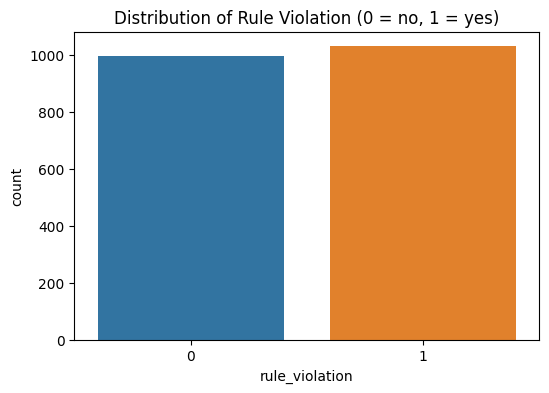

Overall violation rate: 0.508


In [8]:
n_rules      = train_df['rule'].nunique()
n_subreddits = train_df['subreddit'].nunique()
print(f"Number of unique rules:      {n_rules}")
print(f"Number of unique subreddits: {n_subreddits}")

plt.figure(figsize=(6,4))
sns.countplot(x='rule_violation', data=train_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Rule Violation (0 = no, 1 = yes)')
plt.show()

rate_overall = train_df['rule_violation'].mean()
print(f"Overall violation rate: {rate_overall:.3f}")

In [9]:
display(train_df["rule"].unique())

array(['No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.',
       'No legal advice: Do not offer or request legal advice.'],
      dtype=object)

Data set is pretty balanced, just 2 rules to evaluate 

C:\Users\Otávio Coletti\AppData\Local\Temp\ipykernel_10852\1994659688.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='violation_rate', y=rule_stats.index, data=rule_stats.reset_index(), palette=['#1f77b4', '#ff7f0e'])


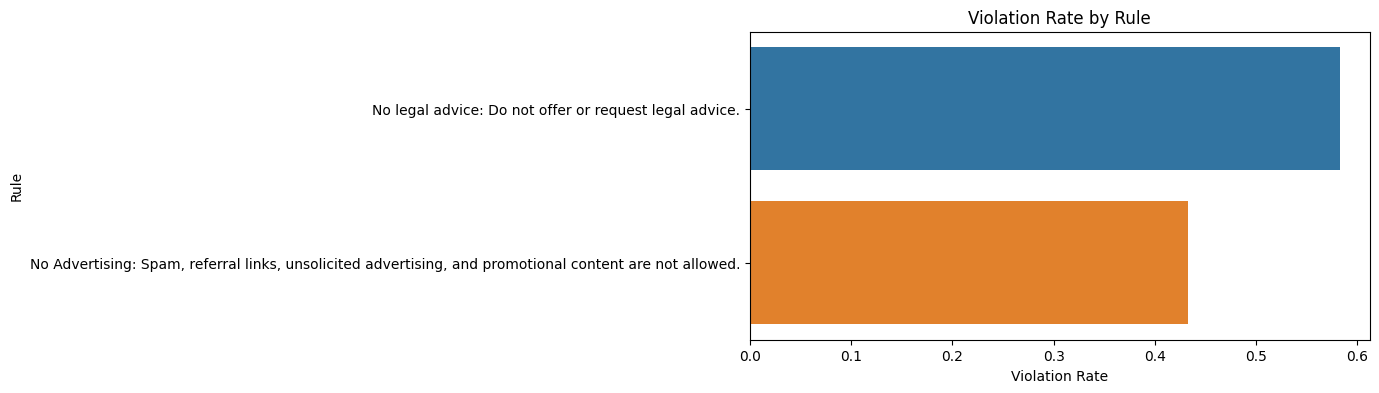

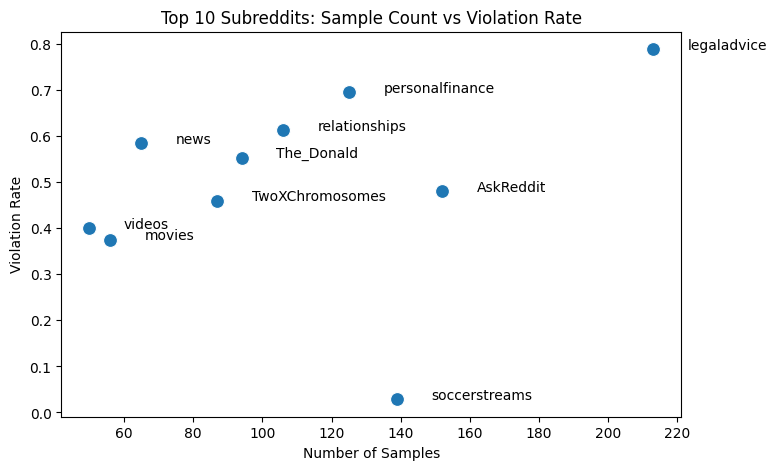

In [12]:
# By rule
rule_stats = train_df.groupby('rule')['rule_violation'] \
    .agg(['mean', 'count']) \
    .rename(columns={'mean':'violation_rate','count':'num_samples'}) \
    .sort_values('num_samples', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='violation_rate', y=rule_stats.index, data=rule_stats.reset_index(), palette=['#1f77b4', '#ff7f0e'])
plt.title('Violation Rate by Rule')
plt.xlabel('Violation Rate')
plt.ylabel('Rule')
plt.show()

# By subreddit (top 10)
sub_stats = train_df.groupby('subreddit')['rule_violation'] \
    .agg(['mean','count']) \
    .rename(columns={'mean':'violation_rate','count':'num_samples'}) \
    .sort_values('num_samples', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.scatterplot(x='num_samples', y='violation_rate', data=sub_stats.reset_index(), s=100)
for _, row in sub_stats.reset_index().iterrows():
    plt.text(row['num_samples']+10, row['violation_rate'], row['subreddit'])
plt.title('Top 10 Subreddits: Sample Count vs Violation Rate')
plt.xlabel('Number of Samples')
plt.ylabel('Violation Rate')
plt.show()

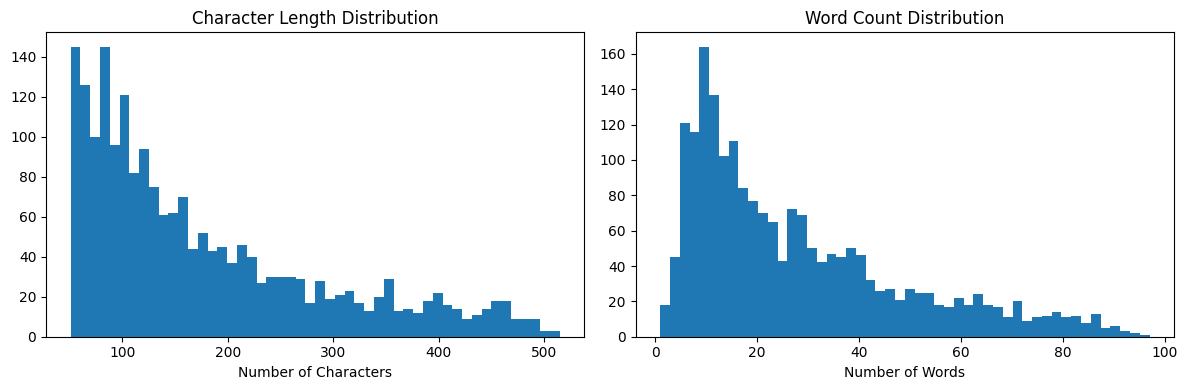

In [13]:
train_df['char_len'] = train_df['body'].str.len()
train_df['word_len'] = train_df['body'].str.split().map(len)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(train_df['char_len'], bins=50)
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Number of Characters')

axes[1].hist(train_df['word_len'], bins=50)
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Number of Words')

plt.tight_layout()
plt.show()

In [14]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizers
vectorizer_uni = CountVectorizer(ngram_range=(1,1), stop_words='english', min_df=5)
vectorizer_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english', min_df=5)

# Fit on all comments
grams_uni = vectorizer_uni.fit_transform(train_df['body'].fillna(""))
grams_bi  = vectorizer_bi.fit_transform(train_df['body'].fillna(""))

# Feature names
feat_uni = np.array(vectorizer_uni.get_feature_names_out())
feat_bi  = np.array(vectorizer_bi.get_feature_names_out())

# Function to get top n-grams for a class
def get_top_ngrams(matrix, labels, feat_names, cls, top_n=20):
    # Select rows for the class
    idx = np.where(labels == cls)[0]
    # Sum term frequencies
    class_sum = np.asarray(matrix[idx].sum(axis=0)).ravel()
    # Get top indices
    top_idx = class_sum.argsort()[::-1][:top_n]
    return feat_names[top_idx]

# Compute top n-grams for each class
labels = train_df['rule_violation'].values
top_uni_non = get_top_ngrams(grams_uni, labels, feat_uni, cls=0)
top_uni_vio = get_top_ngrams(grams_uni, labels, feat_uni, cls=1)
top_bi_non  = get_top_ngrams(grams_bi, labels, feat_bi, cls=0)
top_bi_vio  = get_top_ngrams(grams_bi, labels, feat_bi, cls=1)

print("Top 20 Unigrams (No Violation):", top_uni_non)
print("Top 20 Unigrams (Violation):",   top_uni_vio)
print("Top 20 Bigrams (No Violation):",  top_bi_non)
print("Top 20 Bigrams (Violation):",    top_bi_vio)

Top 20 Unigrams (No Violation): ['com' 'http' 'www' 'stream' 'https' 'hd' 'html' 'watch' 'live' 'mobile'
 'sd' 'english' 'vs' 'just' 'like' 'tv' 'yes' 'free' 'check' 'don']
Top 20 Unigrams (Violation): ['com' 'http' 'www' 'just' 'don' 'https' 'free' 'legal' 'like' 'sex'
 'want' 'law' 'know' 'people' 'illegal' 'police' 'need' 'money' 'll'
 'right']
Top 20 Bigrams (No Violation): ['http www' 'stream http' 'https www' 'youtube com' 'english stream'
 'www youtube' 'hd stream' 'com watch' 'sd stream' 'twitch tv'
 'html mobile' 'live stream' 'mobile yes' 'page dailyetymology'
 'check instagram' 'instagram page' 'https youtu' 'mobile compatible'
 'interesting check' 'oh interesting']
Top 20 Bigrams (Violation): ['http www' 'https www' 'com free' 'fast patched' 'freekarma com'
 'www freekarma' 'free reddit' 'reddit karma' 'glitch fast' 'karma glitch'
 'girls sex' 'findsextoday com' 'free girls' 'sex worldwide' 'girl sex'
 'com girl' 'mysexfind com' 'child support' 'http mysexfind' 'don want']


## 4. Redução de Dimensionalidade e Análise de Violações

Vamos aplicar técnicas de redução de dimensionalidade para visualizar e entender melhor os padrões nos textos que violam as regras.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 4.1 Vectorização TF-IDF
print("=== Preparando dados para redução de dimensionalidade ===")

# Criando vectorizador TF-IDF
# TfidfVectorizer transforma textos em vetores numéricos baseados na frequência das palavras, ponderando por sua importância no corpus.
# Parâmetros:
# - max_features=5000: usa apenas as 5000 palavras/termos mais frequentes.
# - stop_words='english': remove palavras comuns do inglês (como "the", "and").
# - ngram_range=(1, 2): considera unigramas (palavras isoladas) e bigramas (pares de palavras).
# - min_df=2: ignora termos que aparecem em apenas 1 documento.
# - max_df=0.95: ignora termos que aparecem em mais de 95% dos documentos (muito comuns).
# O TF-IDF (Term Frequency-Inverse Document Frequency) calcula um peso para cada termo, sendo maior para termos frequentes em um documento, mas raros no corpus.

tfidf = TfidfVectorizer(
    max_features=5000,  # Top 5000 features
    stop_words='english',
    ngram_range=(1, 2),  # Unigrams e bigrams
    min_df=2,  # Aparecer em pelo menos 2 documentos
    max_df=0.95  # Não aparecer em mais de 95% dos documentos
)

# Transformando textos em vetores TF-IDF
X_tfidf = tfidf.fit_transform(train_df['body'].fillna(""))
feature_names = tfidf.get_feature_names_out()

print(f"Shape da matriz TF-IDF: {X_tfidf.shape}")
print(f"Número de features: {len(feature_names)}")

# Labels para os plots
y_labels = train_df['rule_violation'].values
colors = ['No Violation' if label == 0 else 'Violation' for label in y_labels]

=== Preparando dados para redução de dimensionalidade ===
Shape da matriz TF-IDF: (2029, 5000)
Número de features: 5000


=== Analisando Features Mais Discriminativas ===

=== TOP 20 FEATURES MAIS ASSOCIADAS A VIOLAÇÕES ===
legal: 0.0117
police: 0.0095
lawyer: 0.0090
sue: 0.0087
law: 0.0087
free: 0.0082
sex: 0.0078
legally: 0.0078
illegal: 0.0073
don: 0.0072
com free: 0.0071
girl: 0.0071
ll: 0.0058
code: 0.0058
property: 0.0054
state: 0.0053
girls sex: 0.0051
court: 0.0051
findsextoday com: 0.0050
findsextoday: 0.0050

=== TOP 20 FEATURES MAIS ASSOCIADAS A NÃO VIOLAÇÕES ===
stream: 0.0214
watch: 0.0171
www: 0.0161
http www: 0.0154
hd: 0.0154
https: 0.0140
html: 0.0138
sd: 0.0112
youtube: 0.0112
english: 0.0108
stream http: 0.0108
mobile: 0.0106
com: 0.0101
vs: 0.0100
youtube com: 0.0098
http: 0.0096
live: 0.0095
www youtube: 0.0090
https www: 0.0086
com watch: 0.0084


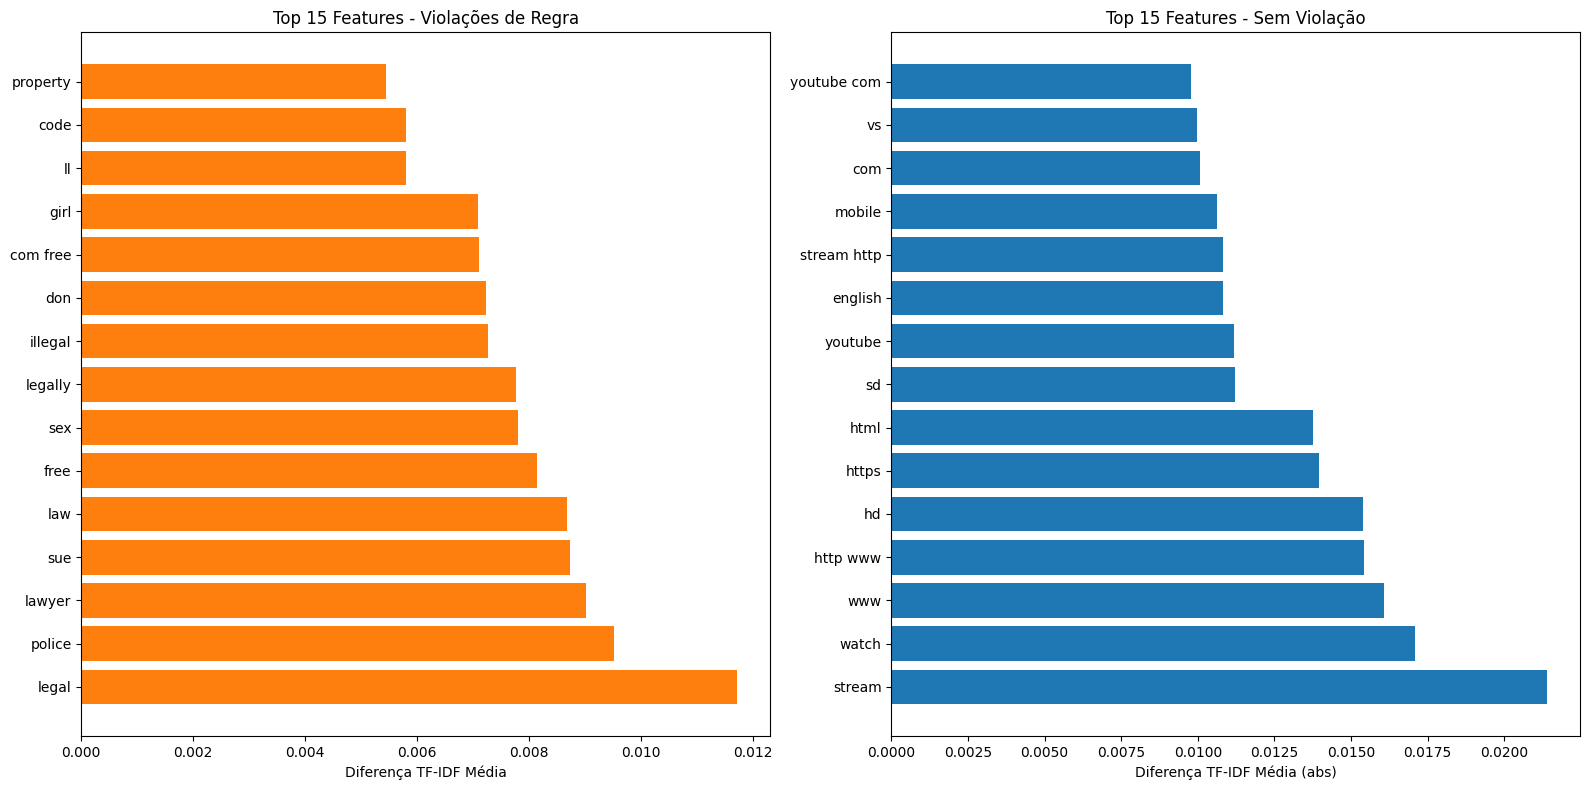

In [8]:
# 4.4 Análise das Features Mais Importantes
print("=== Analisando Features Mais Discriminativas ===")

# Calculando diferença média TF-IDF entre classes
X_tfidf_dense = X_tfidf.toarray()
mean_violation = X_tfidf_dense[y_labels == 1].mean(axis=0)
mean_no_violation = X_tfidf_dense[y_labels == 0].mean(axis=0)

# Diferença entre médias (positivo = mais comum em violações)
feature_diff = mean_violation - mean_no_violation

# Top features para violações
top_violation_indices = feature_diff.argsort()[-20:][::-1]
top_violation_features = [(feature_names[i], feature_diff[i]) for i in top_violation_indices]

# Top features para não violações
top_no_violation_indices = feature_diff.argsort()[:20]
top_no_violation_features = [(feature_names[i], abs(feature_diff[i])) for i in top_no_violation_indices]

print("\n=== TOP 20 FEATURES MAIS ASSOCIADAS A VIOLAÇÕES ===")
for feature, score in top_violation_features:
    print(f"{feature}: {score:.4f}")

print("\n=== TOP 20 FEATURES MAIS ASSOCIADAS A NÃO VIOLAÇÕES ===") 
for feature, score in top_no_violation_features:
    print(f"{feature}: {score:.4f}")

# Visualização das top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Features de violação
violation_features = [f[0] for f in top_violation_features[:15]]
violation_scores = [f[1] for f in top_violation_features[:15]]

ax1.barh(range(len(violation_features)), violation_scores, color='#ff7f0e')
ax1.set_yticks(range(len(violation_features)))
ax1.set_yticklabels(violation_features)
ax1.set_title('Top 15 Features - Violações de Regra')
ax1.set_xlabel('Diferença TF-IDF Média')

# Features de não violação  
no_violation_features = [f[0] for f in top_no_violation_features[:15]]
no_violation_scores = [f[1] for f in top_no_violation_features[:15]]

ax2.barh(range(len(no_violation_features)), no_violation_scores, color='#1f77b4')
ax2.set_yticks(range(len(no_violation_features)))
ax2.set_yticklabels(no_violation_features)
ax2.set_title('Top 15 Features - Sem Violação')
ax2.set_xlabel('Diferença TF-IDF Média (abs)')

plt.tight_layout()
plt.show()

In [14]:
# 4.2 Redução de Dimensionalidade com PCA
print("=== Aplicando PCA ===")

# Aplicando PCA para reduzir para 50 componentes primeiro (para acelerar t-SNE depois)
pca_50 = PCA(n_components=50, random_state=42)
X_pca_50 = pca_50.fit_transform(X_tfidf.toarray())

# PCA para visualização (2D)
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_tfidf.toarray())

print(f"Variância explicada pelas 2 primeiras componentes: {pca_2d.explained_variance_ratio_.sum():.3f}")

# Criando DataFrame para visualização
df_pca = pd.DataFrame({
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'rule_violation': train_df['rule_violation'],
    'rule': train_df['rule'],
    'subreddit': train_df['subreddit'],
    'body_preview': train_df['body'].str[:100] + "..."
})

# Plot PCA
fig = px.scatter(
    df_pca, 
    x='PC1', 
    y='PC2', 
    color='rule_violation',
    color_discrete_map={0: '#1f77b4', 1: '#ff7f0e'},
    title='PCA - Redução de Dimensionalidade dos Textos',
    labels={'rule_violation': 'Violação da Regra'},
    hover_data=['rule', 'subreddit', 'body_preview']
)

fig.update_traces(marker=dict(size=4, opacity=0.6))
fig.show()

print(f"Primeira componente (PC1) explica {pca_2d.explained_variance_ratio_[0]:.3f} da variância")
print(f"Segunda componente (PC2) explica {pca_2d.explained_variance_ratio_[1]:.3f} da variância")

=== Aplicando PCA ===
Variância explicada pelas 2 primeiras componentes: 0.024
Variância explicada pelas 2 primeiras componentes: 0.024


Primeira componente (PC1) explica 0.013 da variância
Segunda componente (PC2) explica 0.012 da variância


In [15]:
# 4.3 Redução de Dimensionalidade com t-SNE
print("=== Aplicando t-SNE (pode demorar alguns minutos) ===")

# Usando uma amostra para acelerar o t-SNE se o dataset for muito grande
sample_size = min(2000, len(train_df))
sample_indices = np.random.choice(len(train_df), sample_size, replace=False)

X_sample = X_pca_50[sample_indices]
y_sample = y_labels[sample_indices]

# Aplicando t-SNE nos dados reduzidos pelo PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

# DataFrame para t-SNE
df_tsne = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'rule_violation': y_sample,
    'rule': train_df.iloc[sample_indices]['rule'].values,
    'subreddit': train_df.iloc[sample_indices]['subreddit'].values,
    'body_preview': train_df.iloc[sample_indices]['body'].str[:100].values + "..."
})

# Plot t-SNE
fig = px.scatter(
    df_tsne, 
    x='TSNE1', 
    y='TSNE2', 
    color='rule_violation',
    color_discrete_map={0: '#1f77b4', 1: '#ff7f0e'},
    title=f't-SNE - Visualização de Clusters nos Textos (amostra de {sample_size} textos)',
    labels={'rule_violation': 'Violação da Regra'},
    hover_data=['rule', 'subreddit', 'body_preview']
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

print(f"t-SNE aplicado em amostra de {sample_size} textos")

=== Aplicando t-SNE (pode demorar alguns minutos) ===


t-SNE aplicado em amostra de 2000 textos
